<a href="https://colab.research.google.com/github/cest0/PPConstrFcst/blob/master/Proto_Hydro_PP_constraints_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hydro power plant constraints forecast

### Import libraries

In [0]:
import pandas as pd
import numpy as np
import array as arr
from pandas import ExcelWriter
from pandas import ExcelFile
import re 
import matplotlib.pyplot as plt
import seaborn as sns

### Read source file into data frame and display columns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Offer_Data.xlsm to Offer_Data.xlsm


In [5]:
df = pd.read_excel('Offer_Data.xlsm', sheet_name='Offer')
display(df.columns)

Index([               'Variante 1',                           1,
                                 2,                           3,
                                 4,                           5,
                                 6,                           7,
                                 8,                       '1.1',
                             '2.1',                       '3.1',
                             '4.1',                       '5.1',
                             '6.1',                       '7.1',
                             '8.1',               'Unnamed: 17',
                      'Variante 2',                       '1.2',
                             '2.2',                       '3.2',
                             '4.2',                       '5.2',
                             '6.2',                       '7.2',
                             '8.2',                       '1.3',
                             '2.3',                       '3.3',
                         

### Check first few lines of imported file

In [6]:
df.head()

,Variante 1,1,2,3,4,5,6,7,8,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,Unnamed: 17,Variante 2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,Unnamed: 35,Variante 3,1.4,2.4,3.4,...,7.5,8.5,Unnamed: 53,Variante 4,1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,1.7,2.7,3.7,4.7,5.7,6.7,7.7,8.7,Unnamed: 71,Min prod date,Min Prod,Unnamed: 74,Inflow lake 1 [m3],Inflow lake 2 [m3],Inflow lake 3 [m3],Inflow lake 4 [m3],Unnamed: 79,Vol lake 1 [1000m3],Vol lake 1 [%],Unnamed: 82,Availability plant 1 [MW],Availability plant 2 [MW],Availability plant 3 [MW],Availability plant 4 [MW],Availability plant 1 [%],Availability plant 2 [%],Availability plant 3 [%],Availability plant 4 [%]
0,2014-04-01,73.8,66.0,42.9,0.0,0.0,0.0,0.0,NaN,4.0,4.0,8.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-01,61.8,24.0,0.0,...,0.0,NaN,NaN,2014-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-01,0.0,NaN,31,4.0,129.0,107.0,NaN,16467,0.16467,NaN,7.8,37.8,25.800,6.0,1.0,1.0,1.000000,1.0
1,2014-04-02,73.8,66.0,42.9,0.0,0.0,0.0,0.0,NaN,4.0,4.0,8.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-02,61.8,24.0,0.0,...,0.0,NaN,NaN,2014-04-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-02,150.0,NaN,0,-14.0,148.0,116.0,NaN,15557,0.15557,NaN,7.8,37.8,25.800,6.0,1.0,1.0,1.000000,1.0
2,2014-04-03,73.8,66.0,42.9,0.0,0.0,0.0,0.0,NaN,4.0,4.0,8.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-03,61.8,24.0,0.0,...,0.0,NaN,NaN,2014-04-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-03,150.0,NaN,10,6.0,132.0,118.0,NaN,14765,0.14765,NaN,7.8,37.8,7.525,6.0,1.0,1.0,0.291667,1.0
3,2014-04-04,73.8,66.0,42.9,0.0,0.0,0.0,0.0,NaN,4.0,4.0,8.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-04,61.8,24.0,0.0,...,0.0,NaN,NaN,2014-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-04,150.0,NaN,19,6.0,150.0,118.0,NaN,13716,0.13716,NaN,7.8,37.8,6.450,6.0,1.0,1.0,0.250000,1.0
4,2014-04-05,72.6,66.0,42.9,0.0,0.0,0.0,0.0,NaN,4.0,4.0,8.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-05,61.8,24.0,0.0,...,0.0,NaN,NaN,2014-04-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2014-04-05,180.0,NaN,41,15.0,148.0,124.0,NaN,13091,0.13091,NaN,7.8,37.8,25.800,6.0,1.0,1.0,1.000000,1.0


In [7]:
# display info about our dataframe, i.e. features types, labels, number of values including NaN indication
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 91 columns):
Variante 1                   1736 non-null datetime64[ns]
1                            1731 non-null float64
2                            1731 non-null float64
3                            1731 non-null float64
4                            1731 non-null float64
5                            1731 non-null float64
6                            1731 non-null float64
7                            1731 non-null float64
8                            1183 non-null float64
1.1                          1731 non-null float64
2.1                          1731 non-null float64
3.1                          1731 non-null float64
4.1                          1731 non-null float64
5.1                          1731 non-null float64
6.1                          1731 non-null float64
7.1                          1731 non-null float64
8.1                          1188 non-null float64
Unnamed: 17        

In [0]:
# Rename first column to "date"
df.rename(columns={ df.columns[0]: "Date"}, inplace=True)
# Force index to be date (as provided in the first column)
df.index = df['Date']

In [9]:
# Extract columns names to be renamed, in order to make them more explicit
col_names = []
for col_name in df.columns:
    col_names.append(col_name)

# loop through all column names, to check which ones need to be made more explicit, i.e. in a V1P2 format 
# where 1 is the variant number and 2 identifies the 2nd value for Power ("P")
for i in range(len(col_names)):
    col_name = col_names[i]
    # if column name if numerical (f. ex 3.4), it is an automatic name assigned by the panda library
    # we give it a more explicit name, in the for Var2H3 (variant number 2, Hour value, 3rd value)
    if re.match( r"^([0-9]?).([0-9]?)$", str(col_name), re.M):
        # check actual format: is there a decimal point?
        if re.match( r"^([0-9]?)$", str(col_name), re.M):
            # no decimal point -> we add one for consistency
            col_name = str(col_name)+".0"
        # name is in format: n.m, n= value index, m = variant nr + indication nb hour or power value
        (n,m) = col_name.split(".")
        # if n is even, this is a power value, if odd, a number of hours
        # m is the variant number (option)
        New_Col_Name = "Var" + str((int(m)+2) // 2) 
        if (int(m) % 2) == 0:
            New_Col_Name += "P"+str(n)
        else:
            New_Col_Name += "H"+str(n) 
        #print(New_Col_Name)
        col_names[i] = New_Col_Name
        
df.columns = col_names

# debug       
for col_name in df.columns:  print(col_name)


Date
Var1P1
Var1P2
Var1P3
Var1P4
Var1P5
Var1P6
Var1P7
Var1P8
Var1H1
Var1H2
Var1H3
Var1H4
Var1H5
Var1H6
Var1H7
Var1H8
Unnamed: 17
Variante 2
Var2P1
Var2P2
Var2P3
Var2P4
Var2P5
Var2P6
Var2P7
Var2P8
Var2H1
Var2H2
Var2H3
Var2H4
Var2H5
Var2H6
Var2H7
Var2H8
Unnamed: 35
Variante 3
Var3P1
Var3P2
Var3P3
Var3P4
Var3P5
Var3P6
Var3P7
Var3P8
Var3H1
Var3H2
Var3H3
Var3H4
Var3H5
Var3H6
Var3H7
Var3H8
Unnamed: 53
Variante 4
Var4P1
Var4P2
Var4P3
Var4P4
Var4P5
Var4P6
Var4P7
Var4P8
Var4H1
Var4H2
Var4H3
Var4H4
Var4H5
Var4H6
Var4H7
Var4H8
Unnamed: 71
Min prod date
Min Prod
Unnamed: 74
Inflow lake 1 [m3]
Inflow lake 2 [m3]
Inflow lake 3 [m3]
Inflow lake 4 [m3]
Unnamed: 79
Vol lake 1 [1000m3]
Vol lake 1 [%]
Unnamed: 82
Availability plant 1 [MW]
Availability plant 2 [MW]
Availability plant 3 [MW]
Availability plant 4 [MW]
Availability plant 1 [%]
Availability plant 2 [%]
Availability plant 3 [%]
Availability plant 4 [%]


### Removal of empty columns

In [13]:
# Remove columns that are unnamed (as they are empty)
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
# debug       
print("Column headings:")
print(df.columns)

Column headings:
Index(['Date', 'Var1P1', 'Var1P2', 'Var1P3', 'Var1P4', 'Var1P5', 'Var1P6',
       'Var1P7', 'Var1P8', 'Var1H1', 'Var1H2', 'Var1H3', 'Var1H4', 'Var1H5',
       'Var1H6', 'Var1H7', 'Var1H8', 'Variante 2', 'Var2P1', 'Var2P2',
       'Var2P3', 'Var2P4', 'Var2P5', 'Var2P6', 'Var2P7', 'Var2P8', 'Var2H1',
       'Var2H2', 'Var2H3', 'Var2H4', 'Var2H5', 'Var2H6', 'Var2H7', 'Var2H8',
       'Variante 3', 'Var3P1', 'Var3P2', 'Var3P3', 'Var3P4', 'Var3P5',
       'Var3P6', 'Var3P7', 'Var3P8', 'Var3H1', 'Var3H2', 'Var3H3', 'Var3H4',
       'Var3H5', 'Var3H6', 'Var3H7', 'Var3H8', 'Variante 4', 'Var4P1',
       'Var4P2', 'Var4P3', 'Var4P4', 'Var4P5', 'Var4P6', 'Var4P7', 'Var4P8',
       'Var4H1', 'Var4H2', 'Var4H3', 'Var4H4', 'Var4H5', 'Var4H6', 'Var4H7',
       'Var4H8', 'Min prod date', 'Min Prod', 'Inflow lake 1 [m3]',
       'Inflow lake 2 [m3]', 'Inflow lake 3 [m3]', 'Inflow lake 4 [m3]',
       'Vol lake 1 [1000m3]', 'Vol lake 1 [%]', 'Availability plant 1 [MW]',
       'Availab

### Removal of redundant columns

### Missing values management

In [0]:
df.drop(labels=['Availability plant 1 [MW]', 'Availability plant 2 [MW]',  \
                'Availability plant 3 [MW]','Availability plant 4 [MW]',   \
                'Min prod date', 'Variante 2','Variante 3','Variante 4',   \
                'Vol lake 1 [1000m3]'],  \
        axis = 1, inplace = True)

In [0]:
# fill up missing 8th value with 0s, for all variants (power nd number of hours)
for iVar in range(1,4+1):
    HourIndex = "Var"+str(iVar)+"H8"
    PwrIndex = "Var"+str(iVar)+"P8"
    # for column 8, replace missing values with 0
    df[HourIndex].fillna(0, inplace=True)
    df[PwrIndex].fillna(0, inplace=True)

In [16]:
# Check missing values
null_columns=df.columns[df.isnull().any()]
df[df.isnull().any(axis=1)][null_columns].head(50)

,Var1P1,Var1P2,Var1P3,Var1P4,Var1P5,Var1P6,Var1P7,Var1H1,Var1H2,Var1H3,Var1H4,Var1H5,Var1H6,Var1H7,Var2P1,Var2P2,Var2P3,Var2P4,Var2P5,Var2P6,Var2P7,Var2H1,Var2H2,Var2H3,Var2H4,Var2H5,Var2H6,Var2H7,Var3P1,Var3P2,Var3P3,Var3P4,Var3P5,Var3P6,Var3P7,Var3H1,Var3H2,Var3H3,Var3H4,Var3H5,Var3H6,Var3H7,Var4P1,Var4P2,Var4P3,Var4P4,Var4P5,Var4P6,Var4P7,Var4H1,Var4H2,Var4H3,Var4H4,Var4H5,Var4H6,Var4H7,Min Prod
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-08,69.0,66.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Fill up missing values by interpolation
df.interpolate(method='linear',limit_direction ='forward',inplace=True)

### Feature engineering

In [0]:
# Add calculated columns for gloabl values, i.e. total energy per variant, average energy per offer
# compute total energy for variante 1 to 4, as scalar product: power * nb of hours

NbVar = pd.Series(np.zeros(len(df)), index = df.index) # initialize to 0

#Loop over 4 variants
for iVar in range(1,4+1):
    PowerVar = pd.Series(np.zeros(len(df))) # initialize to 0
    PowerVar.index = df.index
    VarCount = 0 # count the number of variants defined on a given day
    # loop over the 8 pairs : power, nb of hours
    for i in range(1, 8+1):
        HourIndex = "Var"+str(iVar)+"H"+str(i)
        PwrIndex = "Var"+str(iVar)+"P"+str(i)
        PowerVar += df[HourIndex]*df[PwrIndex]
    # Add column to dataframe
    New_Col_Name = "EnergyVar"+str(iVar)
    df.insert(len(df.columns),New_Col_Name, PowerVar)
    
# Compute number of defined variants
NbVar = df["EnergyVar1"].map(lambda x: 1 if x > 0 else 0 ) + \
        df["EnergyVar2"].map(lambda x: 1 if x > 0 else 0 ) + \
        df["EnergyVar3"].map(lambda x: 1 if x > 0 else 0 ) + \
        df["EnergyVar4"].map(lambda x: 1 if x > 0 else 0 ) 

# Add column that counts number of defined variants       
df.insert(len(df.columns),"NbVar", NbVar)

In [19]:
# debug - fix
#df.drop("NbVar", axis=1, inplace=True)
#df.drop("EnergyVar1", axis=1, inplace=True)
#df.drop("EnergyVar2", axis=1, inplace=True)
#df.drop("EnergyVar3", axis=1, inplace=True)
#df.drop("EnergyVar4", axis=1, inplace=True)
df.head()

,Date,Var1P1,Var1P2,Var1P3,Var1P4,Var1P5,Var1P6,Var1P7,Var1P8,Var1H1,Var1H2,Var1H3,Var1H4,Var1H5,Var1H6,Var1H7,Var1H8,Var2P1,Var2P2,Var2P3,Var2P4,Var2P5,Var2P6,Var2P7,Var2P8,Var2H1,Var2H2,Var2H3,Var2H4,Var2H5,Var2H6,Var2H7,Var2H8,Var3P1,Var3P2,Var3P3,Var3P4,Var3P5,Var3P6,Var3P7,Var3P8,Var3H1,Var3H2,Var3H3,Var3H4,Var3H5,Var3H6,Var3H7,Var3H8,Var4P1,Var4P2,Var4P3,Var4P4,Var4P5,Var4P6,Var4P7,Var4P8,Var4H1,Var4H2,Var4H3,Var4H4,Var4H5,Var4H6,Var4H7,Var4H8,Min Prod,Inflow lake 1 [m3],Inflow lake 2 [m3],Inflow lake 3 [m3],Inflow lake 4 [m3],Vol lake 1 [%],Availability plant 1 [%],Availability plant 2 [%],Availability plant 3 [%],Availability plant 4 [%],EnergyVar1,EnergyVar2,EnergyVar3,EnergyVar4,NbVar
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-01,2014-04-01,73.8,66.0,42.9,0.0,0.0,0.0,0.0,0.0,4.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.8,24.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,4.0,129.0,107.0,0.16467,1.0,1.0,1.000000,1.0,902.4,0.0,961.2,0.0,2
2014-04-02,2014-04-02,73.8,66.0,42.9,0.0,0.0,0.0,0.0,0.0,4.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.8,24.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0,-14.0,148.0,116.0,0.15557,1.0,1.0,1.000000,1.0,902.4,0.0,961.2,0.0,2
2014-04-03,2014-04-03,73.8,66.0,42.9,0.0,0.0,0.0,0.0,0.0,4.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.8,24.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,10,6.0,132.0,118.0,0.14765,1.0,1.0,0.291667,1.0,902.4,0.0,961.2,0.0,2
2014-04-04,2014-04-04,73.8,66.0,42.9,0.0,0.0,0.0,0.0,0.0,4.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.8,24.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,19,6.0,150.0,118.0,0.13716,1.0,1.0,0.250000,1.0,902.4,0.0,961.2,0.0,2
2014-04-05,2014-04-05,72.6,66.0,42.9,0.0,0.0,0.0,0.0,0.0,4.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.8,24.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,41,15.0,148.0,124.0,0.13091,1.0,1.0,1.000000,1.0,897.6,0.0,961.2,0.0,2


In [0]:
# Add feature indicating if the date is a weekend day or a weekday
#df['Weekend'] = (df['Variante 1'].weekday() == 5 | df['Variante 1'].weekday()== 6)
Weekend = df['Date'].map(lambda x: x.weekday()==5 or x.weekday()==6 ) 
# Add column that indicates if day is weekend (True in this case)   
df.insert(len(df.columns),"Weekend", Weekend)

In [21]:
# display basic stasticss of data frame
display(round(df.describe()),2)

,Var1P1,Var1P2,Var1P3,Var1P4,Var1P5,Var1P6,Var1P7,Var1P8,Var1H1,Var1H2,Var1H3,Var1H4,Var1H5,Var1H6,Var1H7,Var1H8,Var2P1,Var2P2,Var2P3,Var2P4,Var2P5,Var2P6,Var2P7,Var2P8,Var2H1,Var2H2,Var2H3,Var2H4,Var2H5,Var2H6,Var2H7,Var2H8,Var3P1,Var3P2,Var3P3,Var3P4,Var3P5,Var3P6,Var3P7,Var3P8,Var3H1,Var3H2,Var3H3,Var3H4,Var3H5,Var3H6,Var3H7,Var3H8,Var4P1,Var4P2,Var4P3,Var4P4,Var4P5,Var4P6,Var4P7,Var4P8,Var4H1,Var4H2,Var4H3,Var4H4,Var4H5,Var4H6,Var4H7,Var4H8,Min Prod,Inflow lake 1 [m3],Inflow lake 2 [m3],Inflow lake 3 [m3],Inflow lake 4 [m3],Vol lake 1 [%],Availability plant 1 [%],Availability plant 2 [%],Availability plant 3 [%],Availability plant 4 [%],EnergyVar1,EnergyVar2,EnergyVar3,EnergyVar4,NbVar
count,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0,1736.0
mean,54.0,41.0,22.0,8.0,2.0,0.0,0.0,3.0,4.0,5.0,3.0,1.0,0.0,0.0,0.0,2.0,16.0,8.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,26.0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.0,273.0,64.0,165.0,80.0,0.0,1.0,1.0,1.0,1.0,683.0,87.0,417.0,37.0,2.0
std,24.0,23.0,22.0,16.0,7.0,3.0,2.0,10.0,4.0,4.0,4.0,2.0,1.0,0.0,0.0,4.0,25.0,15.0,9.0,4.0,2.0,1.0,0.0,2.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,4.0,29.0,17.0,9.0,4.0,1.0,0.0,0.0,5.0,8.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0,13.0,8.0,3.0,2.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,200.0,353.0,88.0,142.0,78.0,0.0,0.0,0.0,0.0,0.0,410.0,172.0,474.0,119.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-210.0,-482.0,-208.0,-224.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,50.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,41.0,12.0,66.0,36.0,0.0,-0.0,1.0,1.0,1.0,391.0,0.0,0.0,0.0,1.0
50%,65.0,47.0,18.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,130.0,35.0,119.0,58.0,0.0,1.0,1.0,1.0,1.0,771.0,0.0,0.0,0.0,2.0
75%,69.0,60.0,44.0,6.0,0.0,0.0,0.0,0.0,8.0,7.0,6.0,1.0,0.0,0.0,0.0,0.0,39.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,381.0,82.0,218.0,109.0,1.0,1.0,1.0,1.0,1.0,942.0,120.0,855.0,0.0,2.0
max,77.0,74.0,84.0,60.0,50.0,72.0,51.0,59.0,24.0,22.0,22.0,16.0,11.0,6.0,3.0,24.0,74.0,68.0,51.0,36.0,52.0,38.0,18.0,18.0,24.0,13.0,15.0,12.0,6.0,6.0,3.0,23.0,77.0,67.0,60.0,40.0,21.0,0.0,0.0,47.0,24.0,12.0,11.0,8.0,1.0,0.0,0.0,24.0,72.0,64.0,46.0,34.0,24.0,9.0,0.0,12.0,24.0,13.0,15.0,9.0,5.0,6.0,0.0,21.0,1470.0,3262.0,471.0,785.0,870.0,1.0,1.0,1.0,1.0,1.0,1546.0,1368.0,1584.0,851.0,4.0


2

### Visual data analysis

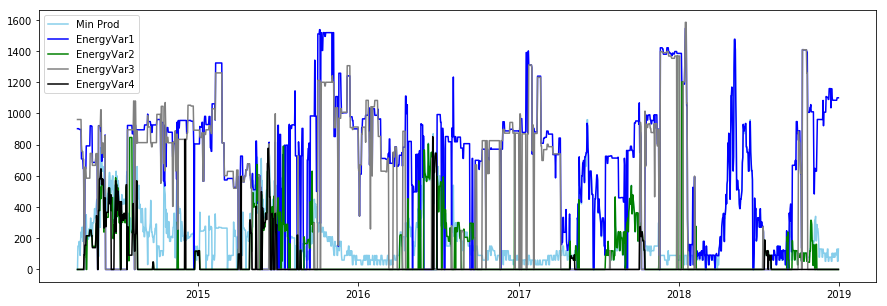

In [23]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
  
# Plot target feature time series all together
fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size  
plt.plot('Min Prod', data=df, color='skyblue')
plt.plot('EnergyVar1', data=df, color='blue')
plt.plot('EnergyVar2', data=df, color='green')
plt.plot('EnergyVar3', data=df, color='grey')
plt.plot('EnergyVar4', data=df, color='black')
plt.legend()


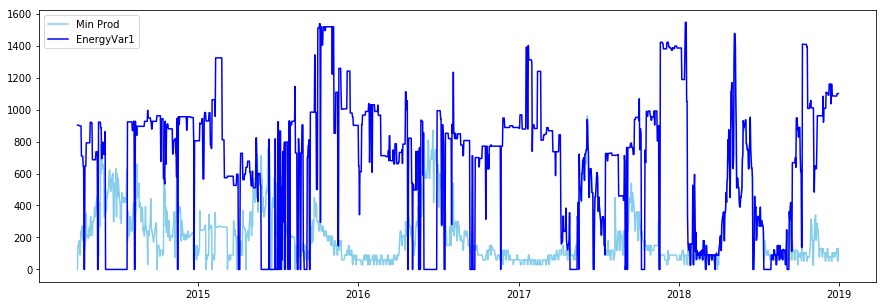

In [24]:
plt.plot('Min Prod', data=df, color='skyblue')
plt.plot('EnergyVar1', data=df, color='blue')
plt.legend()

In [0]:
# check max of all variants
df['MaxVariants'] = df[['EnergyVar1','EnergyVar2','EnergyVar3','EnergyVar4']].max(axis=1)

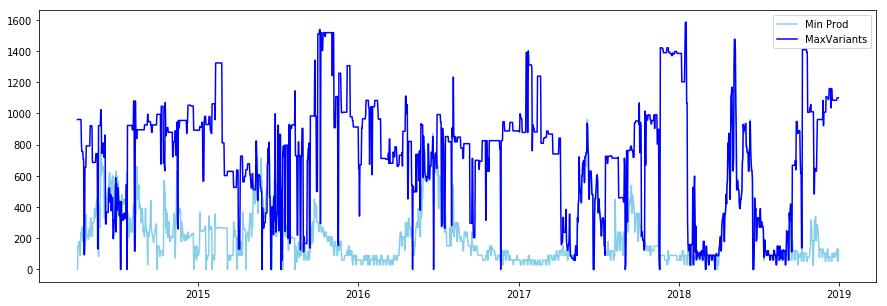

In [26]:
plt.plot('Min Prod', data=df, color='skyblue')
plt.plot('MaxVariants', data=df, color='blue')
plt.legend()

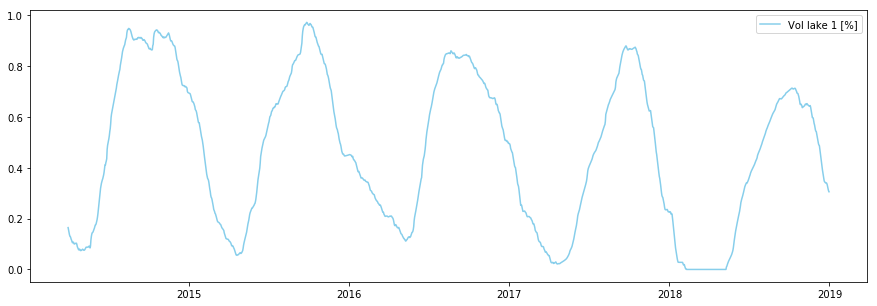

In [27]:
plt.plot('Vol lake 1 [%]', data=df, color='skyblue')
plt.legend()

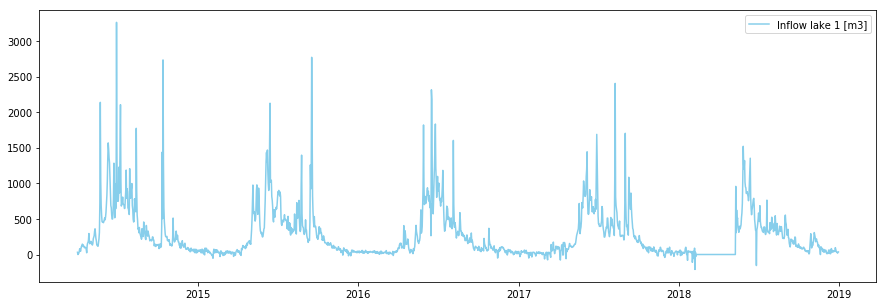

In [28]:
plt.plot('Inflow lake 1 [m3]', data=df, color='skyblue')
plt.legend()

In [29]:
# Events when min production is lower than max allowed production, torance of 5 (122 events)
df[df['Min Prod']-df['MaxVariants'] >5 ][['Min Prod','MaxVariants']]

,Min Prod,MaxVariants
Date,,
2014-04-16,283.000,94.5
2014-04-17,120.000,94.5
2014-05-17,330.000,132.0
2014-05-18,270.000,132.0
2014-06-04,510.000,291.0
2014-06-05,360.000,291.0
2014-06-07,450.000,366.3
2014-06-08,450.000,366.3
2014-06-09,487.000,366.3


In [0]:
# define sub set for statistical analysis
# disguard data columns, and details of variants
df_analysis = df.filter(['Min Prod', 'Inflow lake 1 [m3]', \
       'Inflow lake 2 [m3]', 'Inflow lake 3 [m3]', 'Inflow lake 4 [m3]', \
       'Vol lake 1 [1000m3]', 'Vol lake 1 [%]', 'Availability plant 1 [MW]', \
       'Availability plant 2 [MW]', 'Availability plant 3 [MW]', \
       'Availability plant 4 [MW]', 'Availability plant 1 [%]', \
       'Availability plant 2 [%]', 'Availability plant 3 [%]', \
       'Availability plant 4 [%]', 'EnergyVar1', 'EnergyVar2', 'EnergyVar3',\
       'EnergyVar4', 'MaxVariants','NbVar', 'Weekend'], axis=1)

# force Weekend column to numeric value
df_analysis['Weekend'] = df_analysis['Weekend'] .astype(int)

In [0]:
# Move target features to last columns, i.e "Min Prod", 'EnergyVar1', 'EnergyVar2', 'EnergyVar3','EnergyVar4', 'NbVar'


In [31]:
# display simple stasticss of data frame
display(round(df_analysis.describe(),2))

,Min Prod,Inflow lake 1 [m3],Inflow lake 2 [m3],Inflow lake 3 [m3],Inflow lake 4 [m3],Vol lake 1 [%],Availability plant 1 [%],Availability plant 2 [%],Availability plant 3 [%],Availability plant 4 [%],EnergyVar1,EnergyVar2,EnergyVar3,EnergyVar4,MaxVariants,NbVar
count,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00,1736.00
mean,227.05,273.07,64.02,164.88,79.95,0.47,0.68,0.88,0.92,0.83,682.81,87.44,416.62,36.67,732.65,1.76
std,200.06,353.16,88.25,141.91,77.54,0.30,0.43,0.14,0.20,0.30,409.83,171.67,474.38,118.75,363.13,0.73
min,0.00,-210.00,-482.00,-208.00,-224.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,90.00,41.00,11.60,65.57,36.30,0.19,-0.00,0.83,1.00,0.70,391.20,0.00,0.00,0.00,498.00,1.00
50%,150.00,130.50,35.00,118.60,58.00,0.48,1.00,0.90,1.00,1.00,771.00,0.00,0.00,0.00,796.80,2.00
75%,300.00,381.25,81.93,218.32,109.00,0.72,1.00,1.00,1.00,1.00,942.30,120.00,854.92,0.00,950.32,2.00
max,1470.00,3262.00,471.00,785.00,870.00,0.97,1.00,1.00,1.00,1.00,1545.60,1368.00,1584.00,851.40,1584.00,4.00


<Figure size 1584x1584 with 0 Axes>

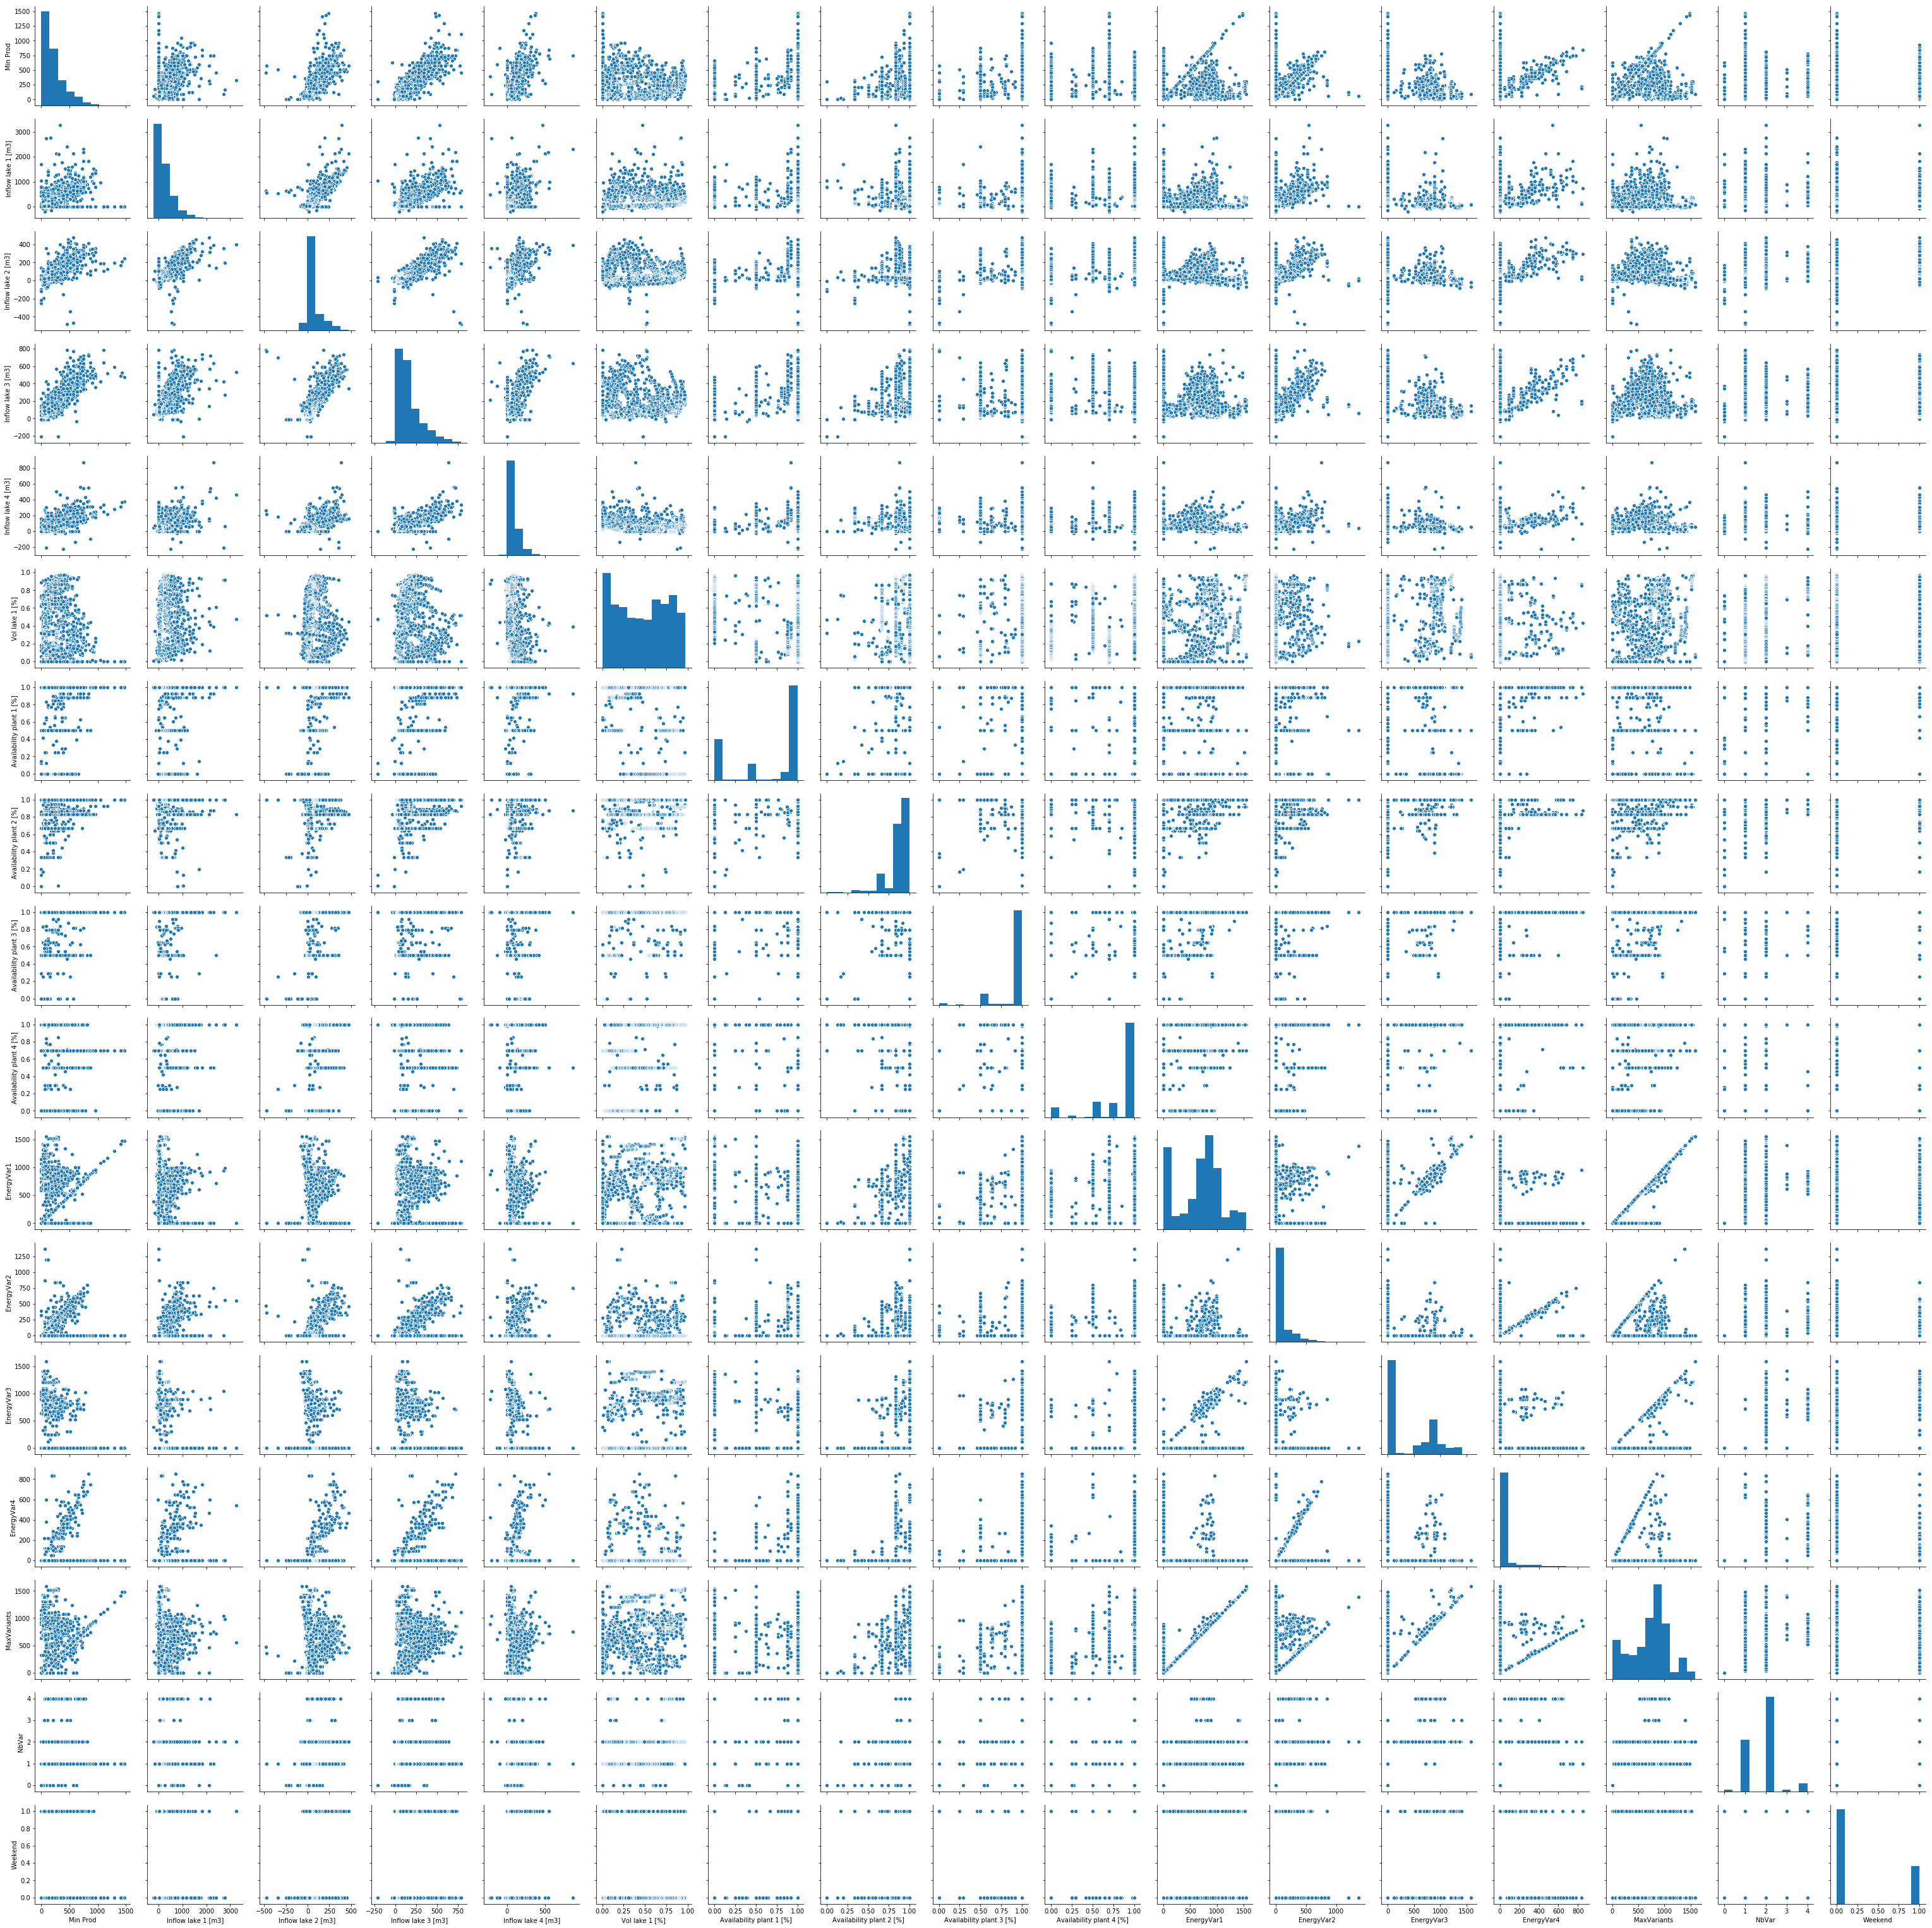

In [34]:
## %matplotlib inline
# Basic correlogram
plt.figure(figsize=(22, 22))
sns.pairplot(df_analysis)


Text(0.5,1,'Minimum Production')

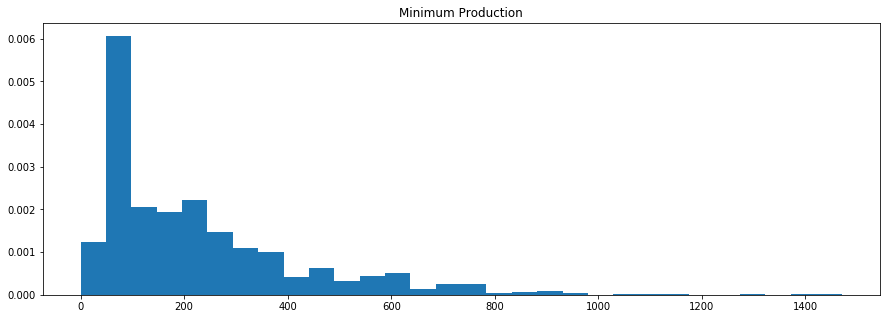

In [0]:
plt.hist(df["Min Prod"], density=True, bins=30)
plt.title('Minimum Production')

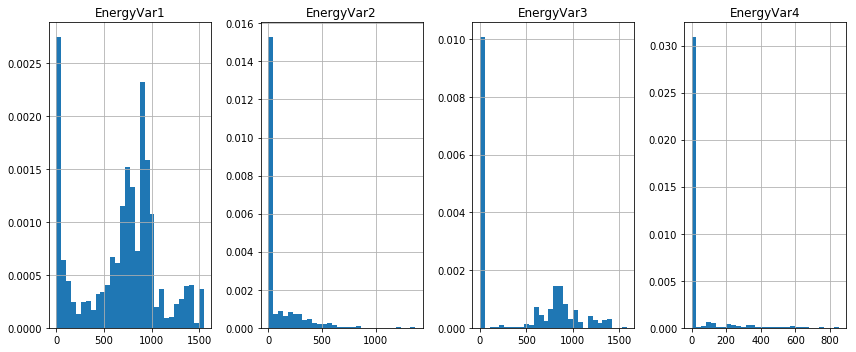

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,5))  # 1 rows, 4 columns
for i in range(1,5):  
    df.hist(column ="EnergyVar"+str(i), density=True, bins=30, ax=ax[i-1])
    
plt.tight_layout()     

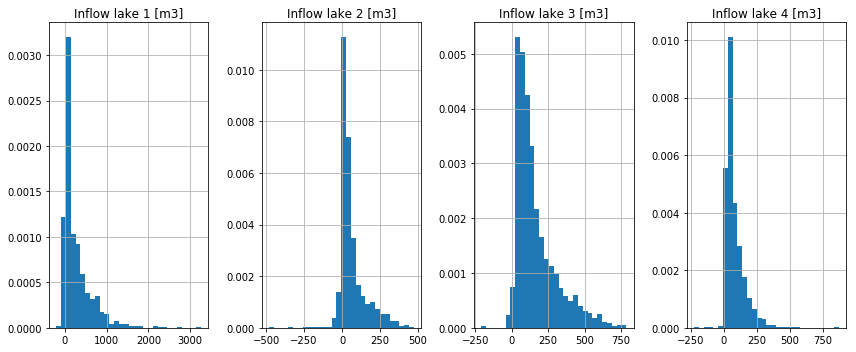

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,5))  # 1 rows, 4 columns
for i in range(1,5):  
    df.hist(column ="Inflow lake "+str(i)+" [m3]", density=True, bins=30, ax=ax[i-1])
    
plt.tight_layout()     

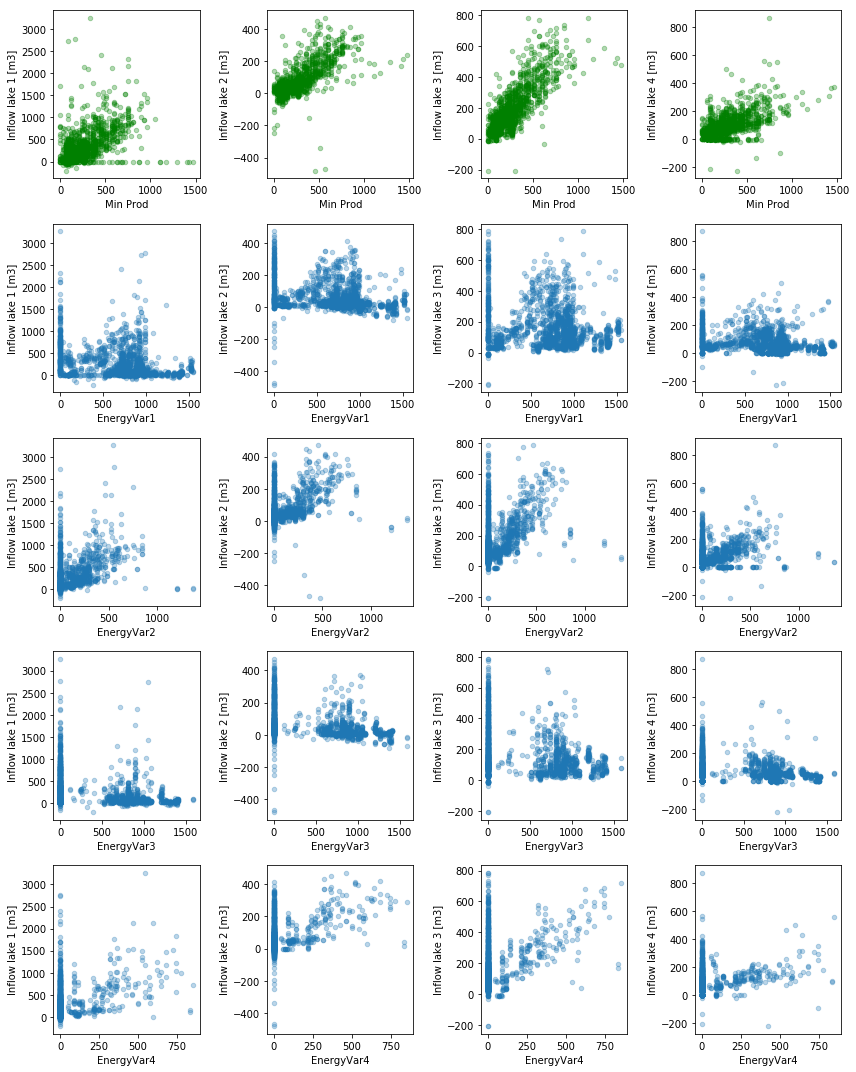

In [37]:
# display scatter plots of output features as a function of lake levels

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(12,15))  # 2 rows, 4 columns
#loop over lakes (1 to 4)
for i in range(1,5):    
    # Plot min production in green color
    df.plot.scatter(x='Min Prod', y='Inflow lake '+str(i)+' [m3]', ax=ax[0, i-1],  c='g', alpha=0.3)
    #loop over variants (1 to 4)
    for j in range (1,5):
        df.plot.scatter(x='EnergyVar'+str(j),  y='Inflow lake '+str(i)+' [m3]', ax=ax[j, i-1], alpha=0.3)

plt.tight_layout() 



## Machine learning analysis and forecasting

### Train / test data set split

In [38]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1736 entries, 2014-04-01 to 2018-12-31
Data columns (total 17 columns):
Min Prod                    1736 non-null float64
Inflow lake 1 [m3]          1736 non-null int64
Inflow lake 2 [m3]          1736 non-null float64
Inflow lake 3 [m3]          1736 non-null float64
Inflow lake 4 [m3]          1736 non-null float64
Vol lake 1 [%]              1736 non-null float64
Availability plant 1 [%]    1736 non-null float64
Availability plant 2 [%]    1736 non-null float64
Availability plant 3 [%]    1736 non-null float64
Availability plant 4 [%]    1736 non-null float64
EnergyVar1                  1736 non-null float64
EnergyVar2                  1736 non-null float64
EnergyVar3                  1736 non-null float64
EnergyVar4                  1736 non-null float64
MaxVariants                 1736 non-null float64
NbVar                       1736 non-null int64
Weekend                     1736 non-null int64
dtypes: float64(14), int64(3)
m

In [39]:
res = np.where(df_analysis.columns== 'MaxVariants')
print(len(df_analysis.columns))
print(res[0])
print(df_analysis.columns)

17
[14]
Index(['Min Prod', 'Inflow lake 1 [m3]', 'Inflow lake 2 [m3]',
       'Inflow lake 3 [m3]', 'Inflow lake 4 [m3]', 'Vol lake 1 [%]',
       'Availability plant 1 [%]', 'Availability plant 2 [%]',
       'Availability plant 3 [%]', 'Availability plant 4 [%]', 'EnergyVar1',
       'EnergyVar2', 'EnergyVar3', 'EnergyVar4', 'MaxVariants', 'NbVar',
       'Weekend'],
      dtype='object')


In [69]:
# We split using a 85/15 ratio, but keeping the data in chronological order
# The dataframe to use is the df_analysis dataframe

CutPoint = round(len(df_analysis.index)*0.85)
print(CutPoint)

regressors = ['Inflow lake 1 [m3]', \
       'Inflow lake 2 [m3]', 'Inflow lake 3 [m3]', 'Inflow lake 4 [m3]', \
       'Vol lake 1 [%]','Availability plant 1 [%]', \
       'Availability plant 2 [%]', 'Availability plant 3 [%]', \
       'Availability plant 4 [%]', 'Weekend']
df_reg = df.filter(regressors, axis=1)

xTrain = df_reg.iloc[:CutPoint, :] 
xTest  = df_reg.iloc[CutPoint:, :]
yTrain = df_analysis.iloc[:CutPoint, 0]   # predict minimum production in a first step
yTest  = df_analysis.iloc[CutPoint:, 0]
print(len(yTrain))
print(len(yTest))

yTest

1476
1476
260


Date
2018-04-16     360.000
2018-04-17     330.000
2018-04-18     390.000
2018-04-19     480.000
2018-04-20     420.000
2018-04-21     540.000
2018-04-22     570.000
2018-04-23     810.000
2018-04-24     690.000
2018-04-25     870.000
2018-04-26     690.000
2018-04-27     630.000
2018-04-28     450.000
2018-04-29     660.009
2018-04-30    1110.000
2018-05-01    1110.000
2018-05-02    1170.000
2018-05-03     960.000
2018-05-04     870.000
2018-05-05     630.000
2018-05-06     720.000
2018-05-07    1290.000
2018-05-08    1470.000
2018-05-09    1427.550
2018-05-10    1410.000
2018-05-11    1050.000
2018-05-12     900.000
2018-05-13     510.000
2018-05-14     510.000
2018-05-15     570.000
                ...   
2018-12-02      52.400
2018-12-03     104.800
2018-12-04      78.600
2018-12-05      78.600
2018-12-06     131.000
2018-12-07     131.000
2018-12-08      52.400
2018-12-09      52.400
2018-12-10      78.600
2018-12-11      78.600
2018-12-12      78.600
2018-12-13      78.600
2018-1

In [0]:
# Forecast using Random Forest (500 trees)
from sklearn.ensemble.forest import RandomForestRegressor
RF_Model = RandomForestRegressor(n_estimators=500)
 
# Fit the RF model with features and labels.
rgr=RF_Model.fit(xTrain, yTrain)

In [71]:
X_test_predict=pd.DataFrame(
    rgr.predict(xTest), columns=['ForecastRF'], index = xTest.index)
X_test_predict

,ForecastRF
Date,
2018-04-16,272.838000
2018-04-17,283.722000
2018-04-18,287.030000
2018-04-19,293.198000
2018-04-20,309.860000
2018-04-21,287.504000
2018-04-22,290.296000
2018-04-23,331.996194
2018-04-24,340.788000


In [72]:
X_test_predict
resid = X_test_predict
resid["yTest"] = yTest
resid.head()

,ForecastRF,yTest
Date,,
2018-04-16,272.838,360.0
2018-04-17,283.722,330.0
2018-04-18,287.030,390.0
2018-04-19,293.198,480.0
2018-04-20,309.860,420.0


In [0]:
#plt.plot(x=resid['Res'], y=resid['yTest'])
#resid['Res']
#resid['Delta'] = resid['yTest']-resid['ForecastRF']

In [74]:
resid.head(300)

,ForecastRF,yTest
Date,,
2018-04-16,272.838000,360.000
2018-04-17,283.722000,330.000
2018-04-18,287.030000,390.000
2018-04-19,293.198000,480.000
2018-04-20,309.860000,420.000
2018-04-21,287.504000,540.000
2018-04-22,290.296000,570.000
2018-04-23,331.996194,810.000
2018-04-24,340.788000,690.000


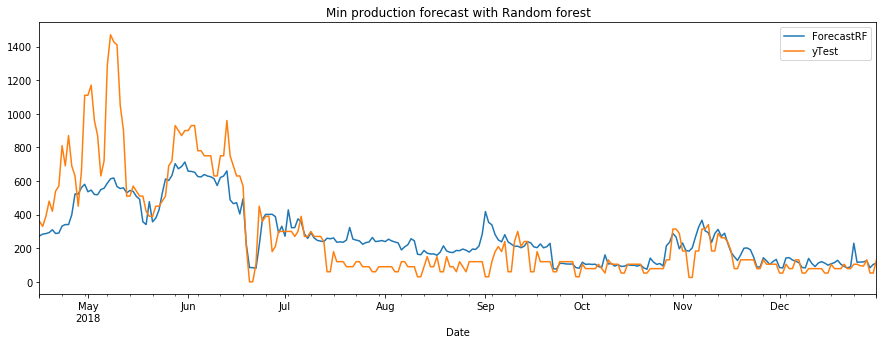

In [75]:
resid.plot(title = 'Min production forecast with Random forest')

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler 

#Scale the data
stScaler = StandardScaler()  
stScaler.fit(xTrain)  
xTrain2 = stScaler.transform(xTrain)  
xTest2 = stScaler.transform(xTest) 

#Construct a multi-layer perceptron 
mlp = MLPRegressor(hidden_layer_sizes = [5,5,3],
                   alpha=0.00001,
                   activation = 'relu',
                   learning_rate_init = 0.001,
                   max_iter = 50000)
mlp.fit(xTrain2,yTrain)
ypred = mlp.predict(xTest2)

In [52]:
X_test_predict=pd.DataFrame(
    ypred, columns=['ForecastANN'], index = xTest.index)
resid = X_test_predict
resid["yTest"] = yTest
#resid['Delta'] = resid['yTest']-resid['ForecastANN']
resid.head(5)

,ForecastANN,yTest
Date,,
2018-04-16,237.293671,360.0
2018-04-17,262.004818,330.0
2018-04-18,301.721716,390.0
2018-04-19,332.398797,480.0
2018-04-20,375.614021,420.0


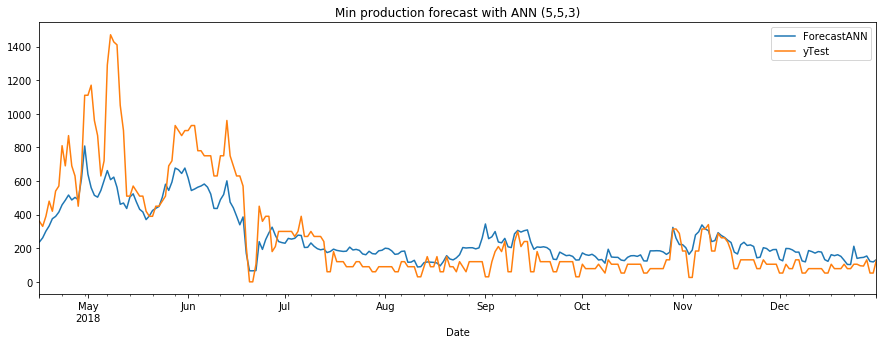

In [67]:
resid.plot(title = 'Min production forecast with ANN (5,5,3)')

In [55]:
# Forecasting Energy Variant 1
# We split using a 85/15 ratio, but keeping the data in chronological order
# The dataframe to use is the df_analysis dataframe

CutPoint = round(len(df_analysis.index)*0.85)
print(CutPoint)

regressors = ['Inflow lake 1 [m3]', \
       'Inflow lake 2 [m3]', 'Inflow lake 3 [m3]', 'Inflow lake 4 [m3]', \
       'Vol lake 1 [%]','Availability plant 1 [%]', \
       'Availability plant 2 [%]', 'Availability plant 3 [%]', \
       'Availability plant 4 [%]', 'Weekend']
df_reg = df.filter(regressors, axis=1)

xTrain = df_reg.iloc[:CutPoint, :] 
xTest  = df_reg.iloc[CutPoint:, :]
yTrain = df_analysis.iloc[:CutPoint, 14]   # predict Energy Variant 1
yTest  = df_analysis.iloc[CutPoint:, 14]
print(len(yTrain))
print(len(yTest))

yTest


1476
1476
260


Date
2018-04-16     355.200
2018-04-17     355.200
2018-04-18     391.800
2018-04-19     481.200
2018-04-20     420.900
2018-04-21     546.900
2018-04-22     569.400
2018-04-23     810.600
2018-04-24     693.000
2018-04-25     873.600
2018-04-26     690.000
2018-04-27     631.200
2018-04-28     450.000
2018-04-29     659.400
2018-04-30    1112.400
2018-05-01    1112.400
2018-05-02    1168.500
2018-05-03     959.700
2018-05-04     870.900
2018-05-05     631.500
2018-05-06     722.100
2018-05-07    1290.600
2018-05-08    1476.000
2018-05-09    1476.000
2018-05-10    1411.200
2018-05-11    1078.800
2018-05-12     897.600
2018-05-13     509.700
2018-05-14     517.200
2018-05-15     571.800
                ...   
2018-12-02    1008.176
2018-12-03    1108.784
2018-12-04    1104.592
2018-12-05    1104.592
2018-12-06    1104.592
2018-12-07    1100.400
2018-12-08    1089.920
2018-12-09    1089.920
2018-12-10    1159.350
2018-12-11    1159.350
2018-12-12    1159.350
2018-12-13    1159.350
2018-1

In [0]:
#Scale the data
stScaler = StandardScaler()  
stScaler.fit(xTrain)  
xTrain2 = stScaler.transform(xTrain)  
xTest2 = stScaler.transform(xTest) 

#Construct a multi-layer perceptron 
mlpEn = MLPRegressor(hidden_layer_sizes = [8,3],
                   alpha=0.00001,
                   activation = 'relu',
                   learning_rate_init = 0.001,
                   max_iter = 50000)
mlpEn.fit(xTrain2,yTrain)
ypredEn = mlpEn.predict(xTest2)

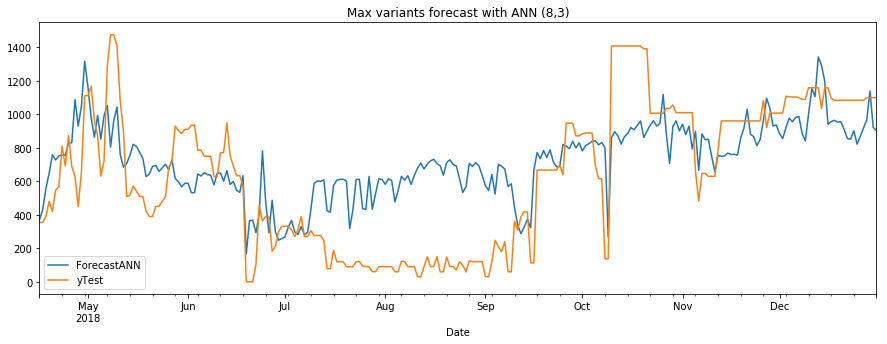

In [66]:
X_test_predict=pd.DataFrame(
    ypredEn, columns=['ForecastANN'], index = xTest.index)
residEn = X_test_predict
residEn["yTest"] = yTest
#resid['Delta'] = resid['yTest']-resid['ForecastANN']
residEn.plot(title = 'Max variants forecast with ANN (8,3)')

In [0]:
# questions:
#- Why do we have negative inflows with huge values?
# inconsistent power/hours pairs: 13/11/2017, variante 3, value 8
# extend calendar with official days off?
